In [1]:
!pip install numpy Pillow Matplotlib pandas seaborn scikit-learn requests scikit-image mlxtend prefixspan scikit-fuzzy umap-learn openpyxl stanza torch torchvision tesseract pytesseract nltk wordcloud spacy tensorflow==2.19.0 tensorflow-datasets opencv-python ucimlrepo nbconvert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 41.3 MB/s eta 0:00:00
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11215 sha256=2c1b9f948798ff5d88db53cb1f1630a76bc16528b1fd54ae8933e27099c7c4ef
  Stored in directory: /root/.cache/pip/wheels/72/36/65/f9e2bbe4998ab4cdf6e7a015f38bdbb6925301dcf2cce34a88
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=00d3fe0d2d16ce2faf032412f631963e3014af40686da2879d9a977aa312b5fb
  Stored in directory: /root/.cache/pip/wheels/13/1f/8e/2d6c0e358fd6d01ca80ecd9185a374bcda358

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 0.0825 - val_loss: 0.0268
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0245 - val_loss: 0.0192
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0177 - val_loss: 0.0147
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0141 - val_loss: 0.0125
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0111 - val_loss: 0.0102
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0101 - val_loss: 0.0096
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 12/20
235/235 ━━━━━━━━━━━━━

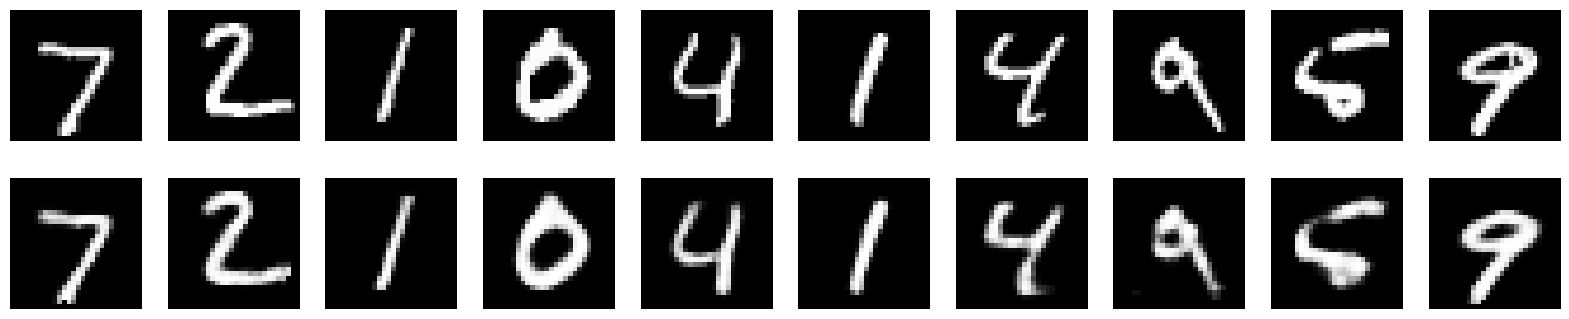

In [4]:
# trabajamos con mnist
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# normalizamos nuestros valores
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# redimensionamos nuestras imagenes de (28*28) -- vector de 784
x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

input_dim = 28 * 28  # tamano de las imagenes

# codificador (reduce la dimensionalidad)
encoder = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
    ]
)

# Decodificador (reconstruye la imagen)
decoder = keras.Sequential(
    [
        layers.Dense(128, activation="relu", input_shape=(64,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(input_dim, activation="sigmoid"),  # salida entre 0 y 1
    ]
)

# uno el encoder con el decoder
autoencoder = keras.Sequential([encoder, decoder])


# compilamos y despues entrenamos
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(
    x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test)
)

test_loss = autoencoder.evaluate(x_test, x_test)
print(f"Test loss: {test_loss}")

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


# mostramos algunas imagenes que el modelo logro reconstruir
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # aca nuestra imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # aca nuestras imagenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray") # Display decoded image
    plt.axis("off")

plt.show()